In [ ]:
import pandas as pd
import seaborn as sn 
import matplotlib.pyplot as plt
from scipy import stats as sts
from sklearn.preprocessing import MinMaxScaler  #biblioteca utilizada para realizar o preprocessamento dos dados
from sklearn.model_selection import train_test_split   # função que realiza a divisão do dataset
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier # importa o classificador árvore de decisão
from sklearn import metrics #importa as métricas para avaliação
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
df = pd.read_csv('winequality-red.csv', sep=';')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?**

R: 12 atributos 1599 instância

**Quantos tipos diferentes de dados existem no dataset do desafio?**

R: Duas (int e float)

**Qual é a proporção (em %) de valores nulos existente na coluna "residual sugar" (resíduo de açúcar)?**

R: São 0%, porque não temos valores nulos no data set

In [ ]:
df['fixed acidity'].describe()

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

**Qual é o desvio padrão para a variável "fixed acidity"?**

R: O Desvio padrão (std) é de 1.74

In [ ]:
df['residual sugar'].median()

2.2

**Qual é a mediana para a variável "residual sugar"?**

R: A mediana(50%) é 2.2

In [ ]:
x = df['fixed acidity']
y = df['pH']
sts.pearsonr(x, y)

(-0.6829781945685314, 4.063034039847446e-220)

**Sobre o coeficiente de correlação de Pearson entre as variáveis "fixed acidity" e "pH", é CORRETO afirmar:**

R: O coeficiente de Person é de -0,68

Existe uma correlação negativa. Quanto maior o "fixed acidity, menor é o "pH".

In [ ]:
x = df['quality']
y = df['alcohol']
sts.pearsonr(x, y)

(0.4761663240011362, 2.831476974777616e-91)

**Sobre o coeficiente de correlação de Pearson entre as variáveis "quality" e "alcohol", mesmo sendo reduzido, é CORRETO dizer:**

R: O coeficiente de Person é de 0.47

Não é possível dizer nada sobre a correlação entre as variáveis.

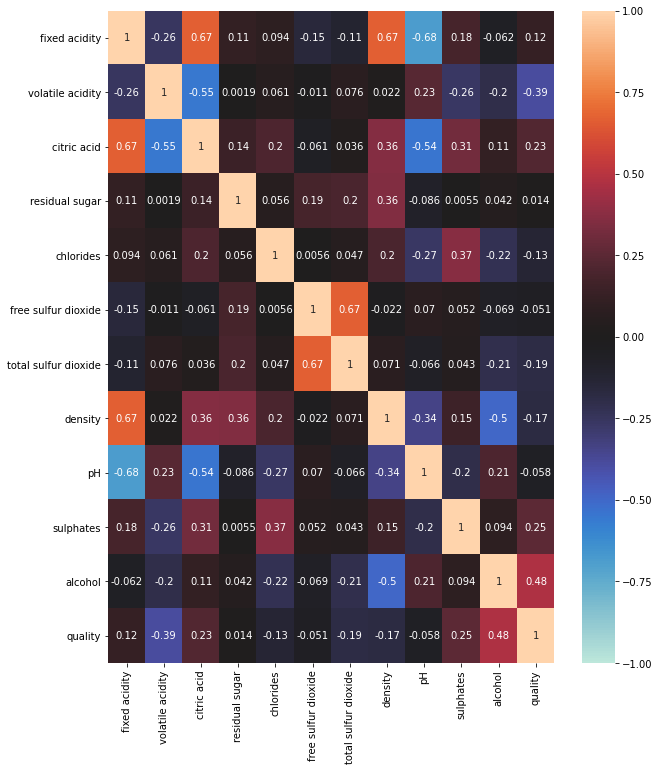

In [ ]:
#realizando o plot da matriz de correlação
plt.figure(figsize=(10, 12))
matriz_de_corr = df.corr()  #construindo a matriz de correlação
sn.heatmap(matriz_de_corr, annot=True, vmin=-1, vmax=1, center= 0)  #plotando a matriz de correlação com o seaborn
plt.show()

In [ ]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

**Quantas instâncias existem para a qualidade do vinho igual a 5?**
R: 681

In [ ]:
scaler = MinMaxScaler() 
scaler_df = df # cópia do dataframe
scaler_df = pd.DataFrame(scaler.fit_transform(scaler_df.values), columns=scaler_df.columns, index=scaler_df.index)

In [ ]:
scaler_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,0.4
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,0.6
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,0.6
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,0.4


In [ ]:
scaler_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,0.527205
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.161514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,0.400000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,0.600000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
scaler_df['fixed acidity'].min()

0.0

**Aplique o modelo de normalização MinMaxScaler com os valores "default" para os dados de entrada. Qual é o menor valor para a variável "fixed acidity"?**

R: min é zero

In [ ]:
#transforma os dados em array e dividindo entre dados de entrada e saída
x = df.iloc[:, :-1].values  #dados de entrada
y = df.iloc[:, 11].values  # saídas ou target

In [ ]:
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [ ]:
y

array([5, 5, 5, ..., 6, 5, 6])

In [ ]:
#realiza a divisão dos dados entre treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1 )# divide 20% para teste

# realiza o processo de normalização dos dados
scaler = StandardScaler()  #objeto que normaliza os dados
scaler.fit(x_train)  #realiza a normalização dos dados

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## **Aplicando modelo KNN**

In [ ]:
#treina o modelo 
classifier_KNN = KNeighborsClassifier(n_neighbors=5) #utiliza a construção por meio de 5 vizinhos
classifier_KNN.fit(x_train, y_train) # aplica a classificação

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier_KNN.predict(x_test)

In [ ]:
#constroi a matriz de confusão para comparar o modelo criado
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.12      0.10      0.11        21
           5       0.64      0.69      0.66       207
           6       0.64      0.55      0.59       195
           7       0.46      0.60      0.52        52
           8       0.33      0.33      0.33         3

    accuracy                           0.59       480
   macro avg       0.37      0.38      0.37       480
weighted avg       0.59      0.59      0.59       480



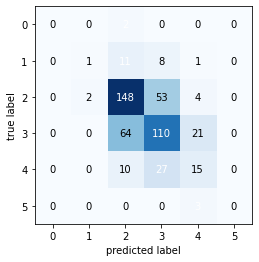

In [ ]:
#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

**Após dividir o dataset utilizando o método train_test_split(entradas_normalizadas, saida, test_size=0.30, random_state=1). Qual foi a acurácia para o KNN?**

R: accuracy foi de 0.57

## **Aplicando modelo Árvore de Decisão**

In [ ]:
# Cria o objeto de classificação através do 
classifier_tree = DecisionTreeClassifier()

# Realiza o treinamento do classificador
classifier_tree = classifier_tree.fit(x_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = classifier_tree.predict(x_test)

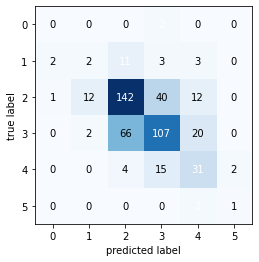

In [ ]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [ ]:
y_pred = classifier_tree.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.12      0.10      0.11        21
           5       0.64      0.69      0.66       207
           6       0.64      0.55      0.59       195
           7       0.46      0.60      0.52        52
           8       0.33      0.33      0.33         3

    accuracy                           0.59       480
   macro avg       0.37      0.38      0.37       480
weighted avg       0.59      0.59      0.59       480



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.12      0.10      0.11        21
           5       0.64      0.69      0.66       207
           6       0.64      0.55      0.59       195
           7       0.46      0.60      0.52        52
           8       0.33      0.33      0.33         3

    accuracy                           0.59       480
   macro avg       0.37      0.38      0.37       480
weighted avg       0.59      0.59      0.59       480



# Aplicando modelo Árvore de Decisão Ramdômica

In [ ]:
classifier_treeramdom = RandomForestClassifier(max_depth=10, random_state=1)

classifier_treeramdom = classifier_treeramdom.fit(x_train,y_train)

y_pred = classifier_treeramdom.predict(x_test)

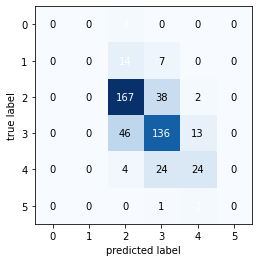

In [ ]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [ ]:
y_pred = classifier_treeramdom.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.72      0.81      0.76       207
           6       0.66      0.70      0.68       195
           7       0.59      0.46      0.52        52
           8       0.00      0.00      0.00         3

    accuracy                           0.68       480
   macro avg       0.33      0.33      0.33       480
weighted avg       0.64      0.68      0.66       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Aplicando o modelo do Algoritmo SVM**

In [ ]:
clf_svm = SVC(gamma='auto',kernel='rbf')

clf_svm = clf_svm.fit(x_train,y_train)

y_pred = clf_svm.predict(x_test)



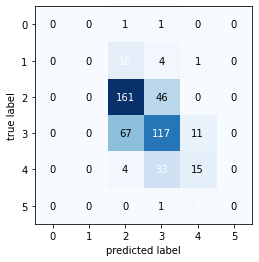

In [ ]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [ ]:
y_pred = clf_svm.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.65      0.78      0.71       207
           6       0.58      0.60      0.59       195
           7       0.52      0.29      0.37        52
           8       0.00      0.00      0.00         3

    accuracy                           0.61       480
   macro avg       0.29      0.28      0.28       480
weighted avg       0.57      0.61      0.58       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Implementando algoritmo de Rede MLP


In [ ]:
clf_mlp = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)

clf_mlp = clf_mlp.fit(x_train,y_train)

y_pred = clf_mlp.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


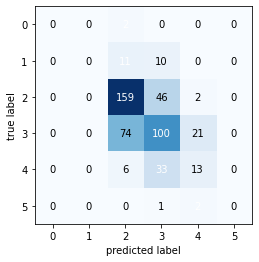

In [ ]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [ ]:
y_pred = clf_svm.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.65      0.78      0.71       207
           6       0.58      0.60      0.59       195
           7       0.52      0.29      0.37        52
           8       0.00      0.00      0.00         3

    accuracy                           0.61       480
   macro avg       0.29      0.28      0.28       480
weighted avg       0.57      0.61      0.58       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
df2 = df
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df2['quality']  = df2['quality'].apply(lambda x: 1 if x > 5 else 0 )


In [ ]:
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
#transforma os dados em array e dividindo entre dados de entrada e saída
x = df2.iloc[:, :-1].values  #dados de entrada
y = df2.iloc[:, 11].values  # saídas ou target

#realiza a divisão dos dados entre treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1 )# divide 20% para teste

# realiza o processo de normalização dos dados
scaler = StandardScaler()  #objeto que normaliza os dados
scaler.fit(x_train)  #realiza a normalização dos dados

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#Aplicando o modelo Random Forest
classifier_treeramdom = RandomForestClassifier(max_depth=10, random_state=1)

classifier_treeramdom = classifier_treeramdom.fit(x_train,y_train)

y_pred = classifier_treeramdom.predict(x_test)

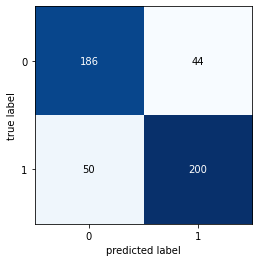

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       230
           1       0.82      0.80      0.81       250

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480



In [ ]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

y_pred = classifier_treeramdom.predict(x_test)
print(classification_report(y_test, y_pred))